
This are my answers to the first Capstone Project from the Udemy course - 2021 Python for Machine
Learning & Data Science Masterclass

The CSV files are also provided in this repository


In [56]:
#Modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [57]:
#Seaborn
import seaborn as sns

In [58]:
#Data
fandango = pd.read_csv("fandango_scrape.csv")

In [59]:
fandango

,FILM,STARS,RATING,VOTES
0,Fifty Shades of Grey (2015),4.0,3.9,34846
1,Jurassic World (2015),4.5,4.5,34390
2,American Sniper (2015),5.0,4.8,34085
3,Furious 7 (2015),5.0,4.8,33538
4,Inside Out (2015),4.5,4.5,15749
...,...,...,...,...
499,Valiyavan (2015),0.0,0.0,0
500,WWE SummerSlam 2015 (2015),0.0,0.0,0
501,Yagavarayinum Naa Kaakka (2015),0.0,0.0,0
502,"Yesterday, Today and Tomorrow (1964)",0.0,0.0,0


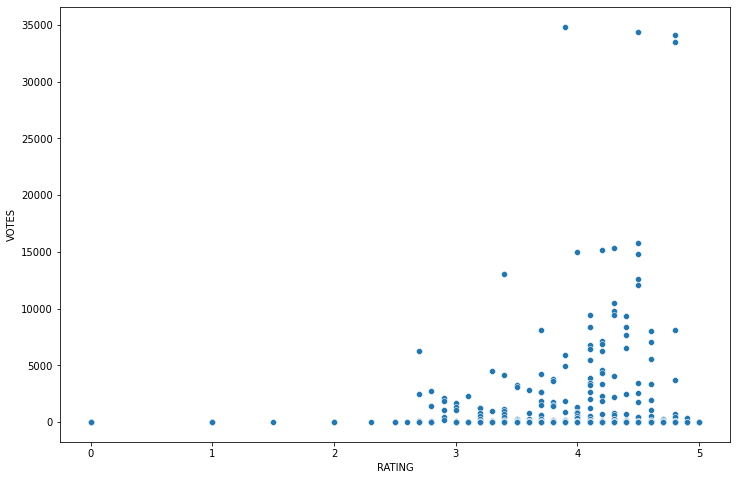

In [60]:
#Scatterplot - showing the relationship between popularity of a film and its rating

plt.figure(figsize = (12,8))
sns.scatterplot(data = fandango, x = 'RATING', y = 'VOTES');

In [61]:
#Calculate the correlation between the columns

fandango.corr()

,STARS,RATING,VOTES
STARS,1.000000,0.994696,0.164218
RATING,0.994696,1.000000,0.163764
VOTES,0.164218,0.163764,1.000000


In [62]:
#Create a new column that is able to strip the year from the title strings 
#and set this new column as YEAR

fandango['YEAR'] = fandango['FILM'].apply(lambda x: int(x[-5:-1]))

In [63]:
#How many movies are in the Fandango DataFrame per year?

fandango['YEAR'].value_counts()

2015    478
2014     23
2016      1
2012      1
1964      1
Name: YEAR, dtype: int64

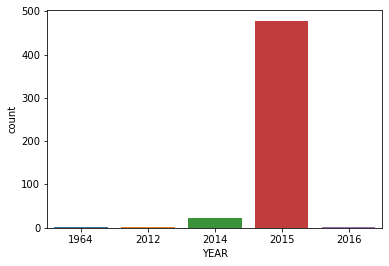

In [64]:
#Visualize the count of movies per year with a plot

sns.countplot(data = fandango, x = 'YEAR');

In [65]:
#What are the 10 movies with the highest number of votes?

fandango.sort_values(by = 'VOTES', ascending = False)[:10]

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015
5,The Hobbit: The Battle of the Five Armies (2014),4.5,4.3,15337,2014
6,Kingsman: The Secret Service (2015),4.5,4.2,15205,2015
7,Minions (2015),4.0,4.0,14998,2015
8,Avengers: Age of Ultron (2015),5.0,4.5,14846,2015
9,Into the Woods (2014),3.5,3.4,13055,2014


In [66]:
#How many movies have zero votes?

len(fandango[fandango['VOTES'] == 0])

69

In [67]:
#Create DataFrame of only reviewed films by removing any films that have zero votes.

fandango2 = fandango[fandango['VOTES'] != 0]

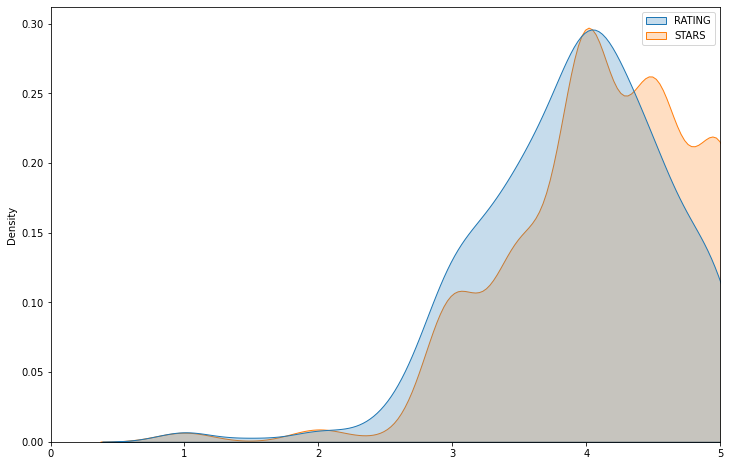

In [68]:
#Comparing the rating vs stars to find out discrepancies

plt.figure(figsize = (12,8))
sns.kdeplot(data = fandango2[['RATING','STARS']],fill = True)
plt.xlim(0,5);

In [69]:
#Create a new column of the different between STARS displayed versus true RATING

fandango2['STARS_DIFF'] = round(fandango2['STARS'] - fandango2['RATING'],1)

<ipython-input-69-1723696d7967>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fandango2['STARS_DIFF'] = round(fandango2['STARS'] - fandango2['RATING'],1)


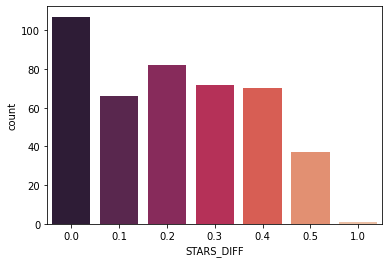

In [70]:
# Create a count plot to display the number of times a certain difference occurs

sns.countplot(x = 'STARS_DIFF', data = fandango2, palette = 'rocket');

In [71]:
#We can see from the plot that one movie was displaying over a 1 star 
#difference than its true rating! 
#What movie had this close to 1 star differential?

fandango2[fandango2['STARS_DIFF'] == 1.0]

,FILM,STARS,RATING,VOTES,YEAR,STARS_DIFF
381,Turbo Kid (2015),5.0,4.0,2,2015,1.0


In [72]:
#Let's now compare the scores from Fandango to other movies sites and see how they compare.
#Read in the "all_sites_scores.csv" file by running the cell below

all_sites = pd.read_csv('all_sites_scores.csv')

all_sites.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560


In [73]:
all_sites.describe()

,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
count,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000
mean,60.849315,63.876712,58.808219,6.519178,6.736986,185.705479,42846.205479
std,30.168799,20.024430,19.517389,1.510712,0.958736,316.606515,67406.509171
min,5.000000,20.000000,13.000000,2.400000,4.000000,4.000000,243.000000
25%,31.250000,50.000000,43.500000,5.700000,6.300000,33.250000,5627.000000
50%,63.500000,66.500000,59.000000,6.850000,6.900000,72.500000,19103.000000
75%,89.000000,81.000000,75.000000,7.500000,7.400000,168.500000,45185.750000
max,100.000000,94.000000,94.000000,9.600000,8.600000,2375.000000,334164.000000


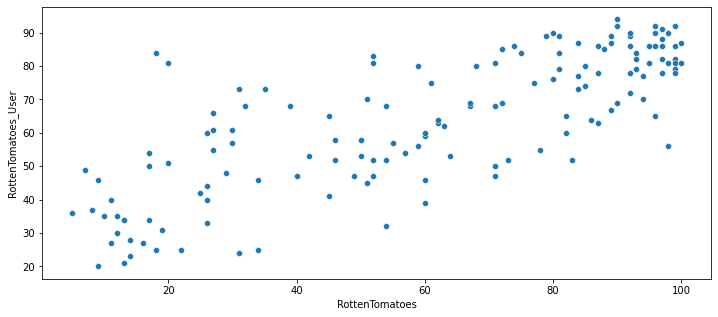

In [74]:
#Create a scatterplot exploring the relationship between RT Critic reviews and RT User reviews

plt.figure(figsize = (12,5))
sns.scatterplot(data = all_sites, x = 'RottenTomatoes', y = 'RottenTomatoes_User');

In [75]:
#Create a new column based off the difference between critics ratings 
#and users ratings for Rotten Tomatoes. 
#Calculate this with RottenTomatoes-RottenTomatoes_User

all_sites['Diff_rating'] = round(all_sites['RottenTomatoes'] - all_sites['RottenTomatoes_User'], 1)

In [76]:
#Calculate the Mean Absolute Difference between RT scores and RT User scores as described above.

abs(all_sites['Diff_rating']).mean()

15.095890410958905

<Figure size 2000x800 with 0 Axes>

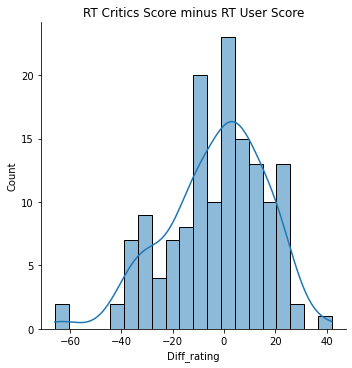

In [77]:
#Plot the distribution of the differences between RT Critics Score and RT User Score
#There should be negative values in this distribution plot
#Feel free to use KDE or Histograms to display this distribution

plt.figure(figsize=(10,4),dpi=200)
sns.displot(data = all_sites, x = 'Diff_rating', kde = True, bins = 20)
plt.title("RT Critics Score minus RT User Score");

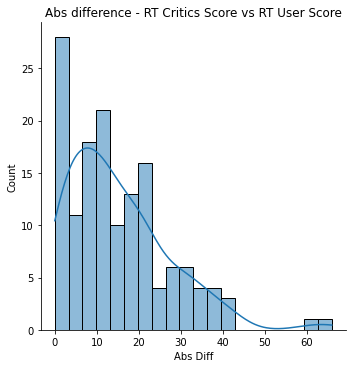

In [78]:
#Now create a distribution showing the absolute value difference 
#between Critics and Users on Rotten Tomatoes.


all_sites['Abs Diff'] = np.vectorize(abs)(all_sites['Diff_rating'])

sns.displot(data = all_sites, x = 'Abs Diff', kde = True, bins = 20)
plt.title('Abs difference - RT Critics Score vs RT User Score');

In [79]:
#What are the top 5 movies users rated higher than critics on average

all_sites.nsmallest(5, columns = 'Diff_rating')[['FILM','Diff_rating']]

,FILM,Diff_rating
3,Do You Believe? (2015),-66
85,Little Boy (2015),-61
105,Hitman: Agent 47 (2015),-42
134,The Longest Ride (2015),-42
125,The Wedding Ringer (2015),-39


In [80]:
#Now show the top 5 movies critics scores higher than users on average

all_sites.nlargest(5, columns = 'Diff_rating')[['FILM','Diff_rating']]

,FILM,Diff_rating
69,Mr. Turner (2014),42
112,It Follows (2015),31
115,While We're Young (2015),31
37,Welcome to Me (2015),24
40,I'll See You In My Dreams (2015),24


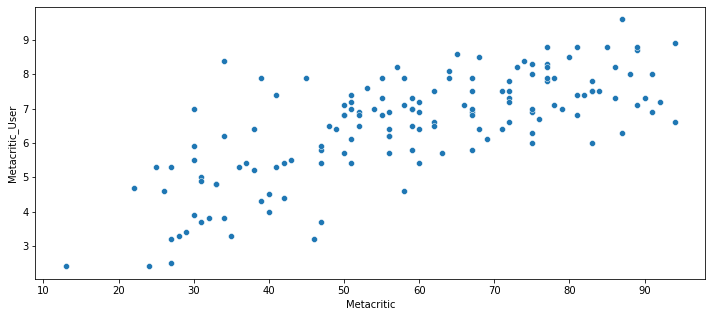

In [81]:
#Display a scatterplot of the Metacritic Rating versus the Metacritic User rating

plt.figure(figsize = (12,5))
sns.scatterplot(data = all_sites, x = 'Metacritic' , y = 'Metacritic_User');

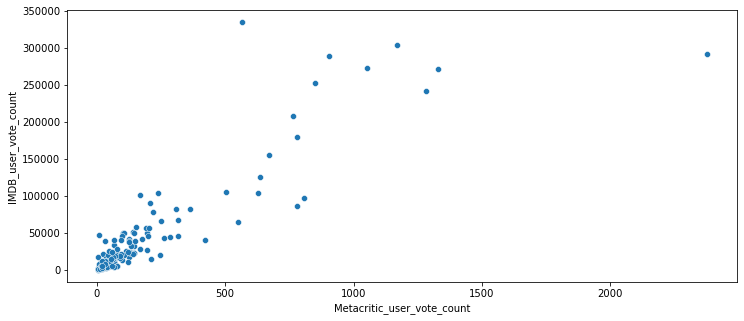

In [82]:
#Create a scatterplot for the relationship 
#between vote counts on MetaCritic versus vote counts on IMDB.

plt.figure(figsize = (12,5))
sns.scatterplot(data = all_sites, y = 'IMDB_user_vote_count', x = 'Metacritic_user_vote_count');

In [83]:
#What movie has the highest IMDB user vote count?

all_sites[all_sites['IMDB_user_vote_count'] == all_sites['IMDB_user_vote_count'].max()]

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Diff_rating,Abs Diff
14,The Imitation Game (2014),90,92,73,8.2,8.1,566,334164,-2,2


In [84]:
#What movie has the highest Metacritic User Vote count?

all_sites[all_sites['Metacritic_user_vote_count'] == all_sites['Metacritic_user_vote_count'].max()]

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Diff_rating,Abs Diff
88,Mad Max: Fury Road (2015),97,88,89,8.7,8.3,2375,292023,9,9


In [85]:
# Combine the Fandango Table with the All Sites table. 
# Not every movie in the Fandango table is in the All Sites table, 
# since some Fandango movies have very little or no reviews. 
# We only want to compare movies that are in both DataFrames, 
# so do an inner merge to merge together both DataFrames based on the FILM columns.

joint_df = pd.merge(all_sites, fandango, how = 'inner')

joint_df.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Diff_rating,Abs Diff,STARS,RATING,VOTES,YEAR
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107,-12,12,5.0,4.5,14846,2015
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709,5,5,5.0,4.5,12640,2015
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660,-10,10,5.0,4.5,12055,2015
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136,-66,66,5.0,4.5,1793,2015
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560,-14,14,3.5,3.0,1021,2015


In [86]:
#Normalizing the ratings from RT, IMDB and Metacritic

joint_df['RT_Norm'] = joint_df['RottenTomatoes'] / 20
joint_df['RTU_Norm'] = joint_df['RottenTomatoes_User'] / 20
joint_df['Meta_Norm'] = joint_df['Metacritic'] / 20
joint_df['Meta_U_Norm'] = joint_df['Metacritic_User'] / 2
joint_df['IMDB_Norm'] = joint_df['IMDB'] / 2

In [87]:
#New dataframe with only the normalized 

norm_scores = joint_df[['STARS', 'RATING', 'RT_Norm','RTU_Norm', 'Meta_Norm', 
                       'Meta_U_Norm', 'IMDB_Norm']]

In [88]:
norm_scores

,STARS,RATING,RT_Norm,RTU_Norm,Meta_Norm,Meta_U_Norm,IMDB_Norm
0,5.0,4.5,3.70,4.30,3.30,3.55,3.90
1,5.0,4.5,4.25,4.00,3.35,3.75,3.55
2,5.0,4.5,4.00,4.50,3.20,4.05,3.90
3,5.0,4.5,0.90,4.20,1.10,2.35,2.70
4,3.5,3.0,0.70,1.40,1.45,1.70,2.55
...,...,...,...,...,...,...,...
140,4.0,4.0,4.35,3.90,3.35,3.95,3.70
141,3.5,3.5,4.85,4.10,4.15,3.75,3.60
142,3.5,3.5,4.85,3.90,4.45,4.40,3.70
143,3.5,3.5,5.00,4.05,4.50,3.65,3.90


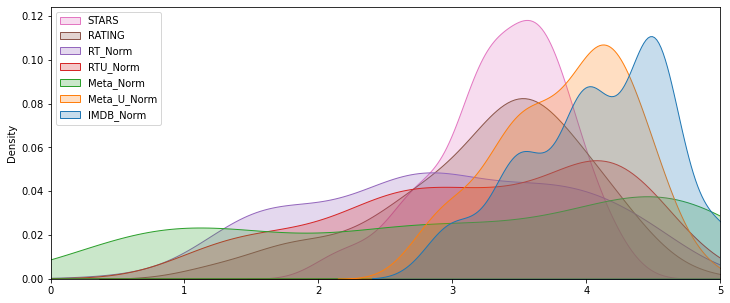

In [89]:
#Create a plot comparing the distributions of normalized ratings across all sites

plt.figure(figsize = (12,5))
sns.kdeplot(data = norm_scores[['STARS', 'RATING', 'RT_Norm','RTU_Norm', 'Meta_Norm', 
                       'Meta_U_Norm', 'IMDB_Norm']], fill = True)
plt.legend(['STARS', 'RATING', 'RT_Norm','RTU_Norm', 'Meta_Norm', 
                       'Meta_U_Norm', 'IMDB_Norm'], loc = 'upper left')
plt.xlim(0,5);

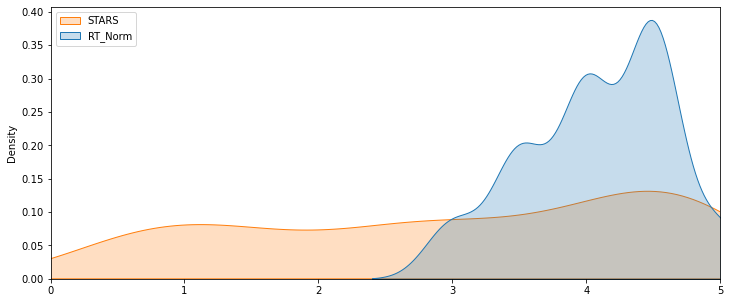

In [90]:
# Create a KDE plot that compare the distribution of 
# RT critic ratings against the STARS displayed by Fandango

plt.figure(figsize = (12,5))
sns.kdeplot(data = norm_scores[['STARS', 'RT_Norm',]], fill = True)
plt.legend(['STARS', 'RT_Norm'], loc = 'upper left')
plt.xlim(0,5);

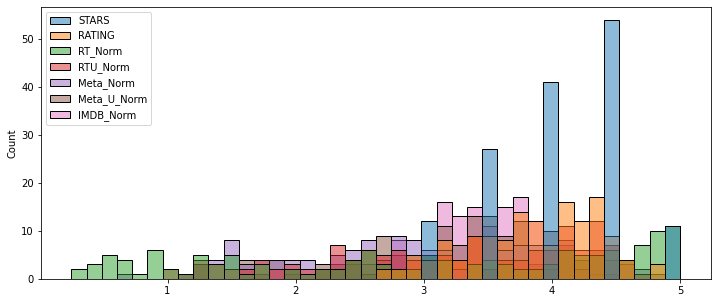

In [91]:
#Create a histplot comparing all normalized scores

plt.figure(figsize = (12,5))
sns.histplot(data = norm_scores, bins = 40);

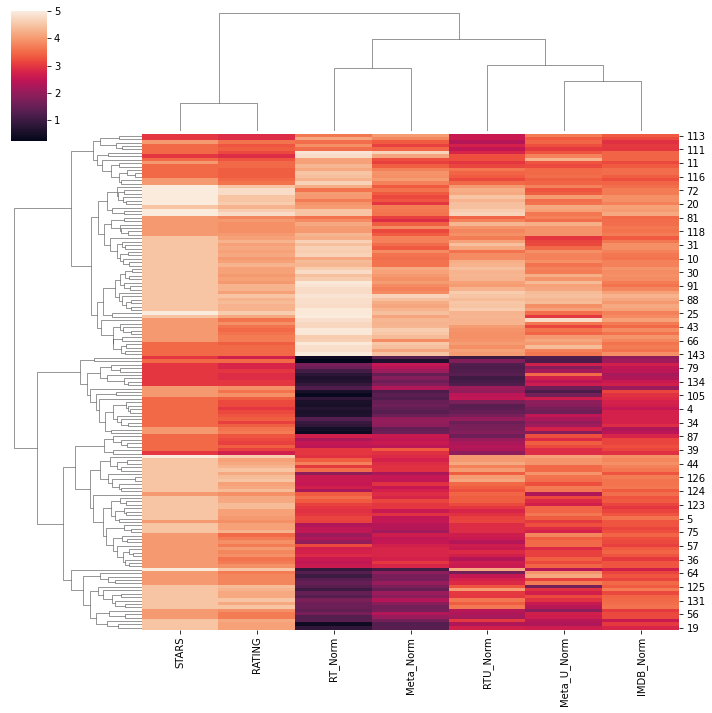

In [92]:
#Create a clustermap visualization of all normalized scores
#Note the differences in ratings, highly rated movies should be clustered together versus poorly rated movies 
#Note: This clustermap does not need to have the FILM titles as the index, feel free to drop it for the clustermap

sns.clustermap(data = norm_scores);

In [117]:
# Clearly Fandango is rating movies much higher than other sites, especially considering that it is then displaying a rounded up version of the rating. 
# Let's examine the top 10 worst movies. Based off the Rotten Tomatoes Critic Ratings, what are the top 10 lowest rated movies? 
# What are the normalized scores across all platforms for these movies? 
# You may need to add the FILM column back in to your DataFrame of normalized scores to see the results.

norm_scores = joint_df[['STARS', 'RATING', 'RT_Norm','RTU_Norm', 'Meta_Norm', 
                       'Meta_U_Norm', 'IMDB_Norm', 'FILM']]

In [118]:
norm_scores.nsmallest(10, columns = 'RT_Norm')

,STARS,RATING,RT_Norm,RTU_Norm,Meta_Norm,Meta_U_Norm,IMDB_Norm,FILM
132,3.5,3.5,0.25,1.80,0.65,1.20,2.15,Paul Blart: Mall Cop 2 (2015)
105,4.0,3.9,0.35,2.45,1.40,1.65,2.95,Hitman: Agent 47 (2015)
53,4.0,3.7,0.40,1.85,1.55,1.85,2.45,Hot Pursuit (2015)
15,4.5,4.1,0.45,2.30,1.30,2.30,3.05,Taken 3 (2015)
48,3.0,2.7,0.45,1.00,1.35,1.25,2.00,Fantastic Four (2015)
33,4.0,3.6,0.50,1.75,1.50,2.75,2.30,The Boy Next Door (2015)
35,4.0,3.6,0.55,2.00,1.20,1.20,3.15,The Loft (2015)
60,3.5,3.2,0.55,1.35,1.60,1.90,2.70,Unfinished Business (2015)
58,3.5,3.2,0.60,1.75,1.50,1.95,2.75,Seventh Son (2015)
59,3.5,3.2,0.60,1.50,1.35,1.60,2.75,Mortdecai (2015)


In [119]:
#Visualize the distribution of ratings across all sites for the top 10 worst movies

worst_movies = norm_scores.drop('FILM', axis = 1).nsmallest(10, columns = 'RT_Norm')

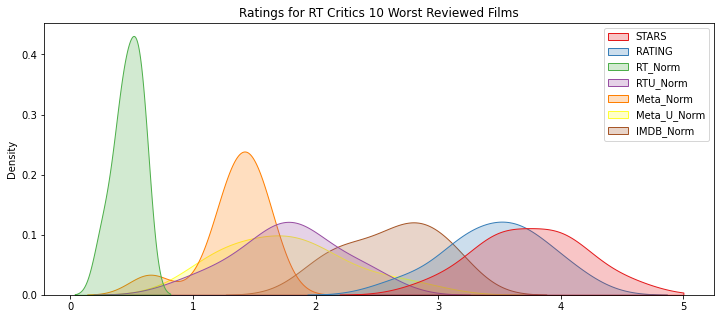

In [120]:
plt.figure(figsize = (12,5))
sns.kdeplot(data = worst_movies, fill = True, clip=[0,5], shade=True, palette='Set1')
plt.title('Ratings for RT Critics 10 Worst Reviewed Films');